In [2]:
import matplotlib.pyplot as plt
import imageio.v3 as iio
import imageio
import geopandas as gpd
import os
import io
from data_sources.nbac_fire_data_source import NbacFireDataSource
from boundaries.canada_boundary import CanadaBoundary
from data_sources.canada_boundary_data_source import CanadaBoundaryDataSource
from targets.fire_occurrence_target import FireOccurrenceTarget
from pathlib import Path
from osgeo import gdal
from IPython.display import Image, display

In [3]:
years = range(2001, 2024)
target_epsg = 3347

canada_output_path = Path("../data/canada_boundary/")
canada = CanadaBoundary(CanadaBoundaryDataSource(canada_output_path))
canada.load(exclude_area_above_60_degree=False)
canada.boundary = canada.boundary.to_crs(epsg=target_epsg)

raw_data_path = Path("../data/raw/")
fire_data_source = NbacFireDataSource(raw_data_path)

Canada boundary shapefile already downloaded, skipping download!


# Preview NBAC Fire Polygons

Canada fire polygons already downloaded for year 2001, skipping download!
Canada fire polygons already downloaded for year 2002, skipping download!
Canada fire polygons already downloaded for year 2003, skipping download!
Canada fire polygons already downloaded for year 2004, skipping download!
Canada fire polygons already downloaded for year 2005, skipping download!
Canada fire polygons already downloaded for year 2006, skipping download!
Canada fire polygons already downloaded for year 2007, skipping download!
Canada fire polygons already downloaded for year 2008, skipping download!
Canada fire polygons already downloaded for year 2009, skipping download!
Canada fire polygons already downloaded for year 2010, skipping download!
Canada fire polygons already downloaded for year 2011, skipping download!
Canada fire polygons already downloaded for year 2012, skipping download!
Canada fire polygons already downloaded for year 2013, skipping download!
Canada fire polygons already downloade

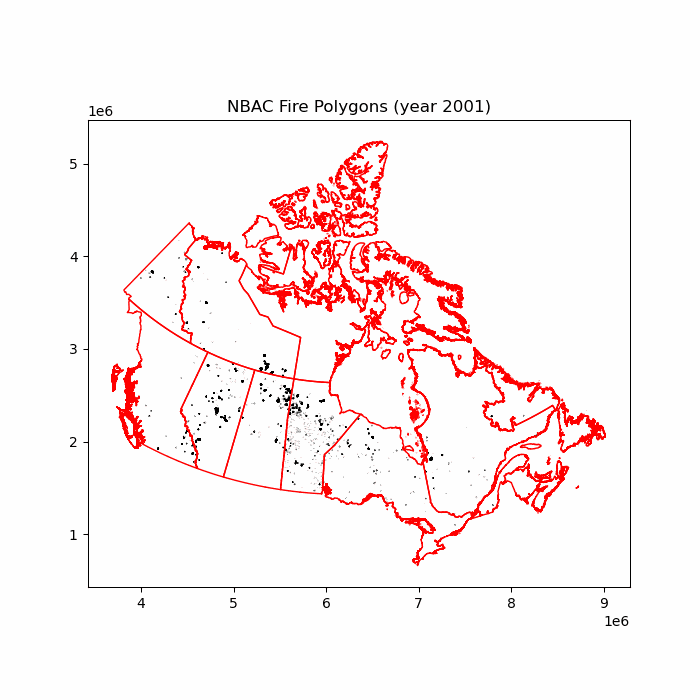

In [3]:
def get_fire_polygons_img(year, target_epsg):
    fire_polygons = fire_data_source.download(year)
    fire_polygons = fire_polygons.to_crs(epsg=target_epsg)

    fig, ax = plt.subplots(figsize=(7, 7))
    fire_polygons.plot(ax=ax, edgecolor='k', facecolor='none')
    canada.boundary.plot(ax=ax, edgecolor='r', facecolor='none')
    ax.set_title(f"NBAC Fire Polygons (year {year})")
    
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    plt.close(fig)
    buf.seek(0)
    return buf

images = [iio.imread(get_fire_polygons_img(year, target_epsg)) for year in years]

gif_buf = io.BytesIO()
imageio.mimsave(gif_buf, images, format='GIF', fps=1, loop=0)
gif_buf.seek(0)

display(Image(data=gif_buf.getvalue(), format='gif'))

# Preview Fire Occurrences Target

In [5]:
resolution_in_meters = 250
fire_occurrence_target = FireOccurrenceTarget(
    fire_data_source=fire_data_source,
    canada=canada,
    resolution_in_meters=resolution_in_meters,
    target_epsg_code=target_epsg,
    raw_data_output_folder_path=raw_data_path,
    target_data_output_folder_path=Path("../data/target/")
)

Canada fire polygons already downloaded for year 2001, skipping download!
Canada boundary shapefile already downloaded, skipping download!


/home/user/micromamba/envs/wildfire/lib/python3.9/site-packages/osgeo/osr.py:410: FutureWarning: Neither osr.UseExceptions() nor osr.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


Canada fire polygons already downloaded for year 2002, skipping download!
Canada boundary shapefile already downloaded, skipping download!
Canada fire polygons already downloaded for year 2003, skipping download!
Canada boundary shapefile already downloaded, skipping download!
Canada fire polygons already downloaded for year 2004, skipping download!
Canada boundary shapefile already downloaded, skipping download!
Canada fire polygons already downloaded for year 2005, skipping download!
Canada boundary shapefile already downloaded, skipping download!
Canada fire polygons already downloaded for year 2006, skipping download!
Canada boundary shapefile already downloaded, skipping download!
Canada fire polygons already downloaded for year 2007, skipping download!
Canada boundary shapefile already downloaded, skipping download!
Canada fire polygons already downloaded for year 2008, skipping download!
Canada boundary shapefile already downloaded, skipping download!
Canada fire polygons alread

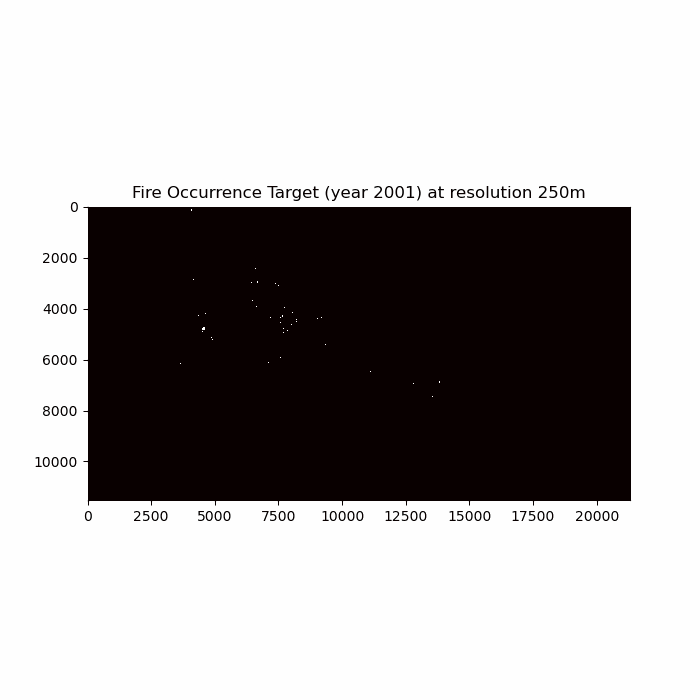

In [5]:
def get_fire_occurrence_target_img(fire_occurrence_target: FireOccurrenceTarget, year: int):
    fire_occurrence_target_file_path = fire_occurrence_target.generate(year)
    fire_occurrence_target_ds = gdal.Open(str(fire_occurrence_target_file_path.resolve()))
    fire_occurrence_target_band = fire_occurrence_target_ds.GetRasterBand(1)
    fire_occurrence_target_data = fire_occurrence_target_band.ReadAsArray()

    fig, ax = plt.subplots(figsize=(7, 7))
    ax.imshow(fire_occurrence_target_data, cmap='binary', interpolation='nearest')
    ax.set_title(f"Fire Occurrence Target (year {year}) at resolution {resolution_in_meters}m")

    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    plt.close(fig)
    buf.seek(0)
    return buf

images = [iio.imread(get_fire_occurrence_target_img(fire_occurrence_target, year)) for year in years]

gif_buf = io.BytesIO()
imageio.mimsave(gif_buf, images, format='GIF', fps=1, loop=0)
gif_buf.seek(0)

display(Image(data=gif_buf.getvalue(), format='gif'))

# Preview Multi-year Target

## 3 Years Aggregation Example

Canada fire polygons already downloaded for year 2010, skipping download!
Canada boundary shapefile already downloaded, skipping download!
Canada fire polygons already downloaded for year 2011, skipping download!
Canada boundary shapefile already downloaded, skipping download!
Canada fire polygons already downloaded for year 2012, skipping download!
Canada boundary shapefile already downloaded, skipping download!


Text(0.5, 1.0, 'Fire Occurrence Target (years 2010-2012) at resolution 250m')

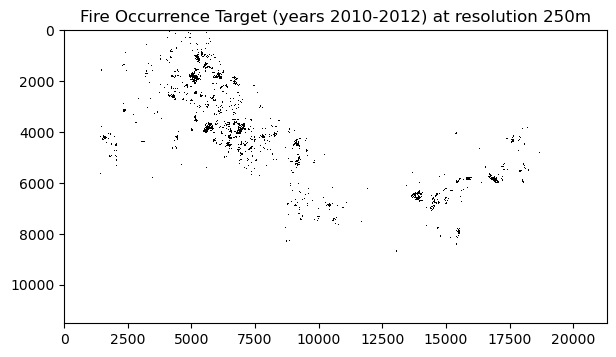

In [13]:
fire_occurrence_target_file_paths = fire_occurrence_target.generate_targets(range(2010, 2013))

fig, ax = plt.subplots(figsize=(7, 7))
fire_occurrence_target_ds_3_years = gdal.Open(str(fire_occurrence_target_file_paths[0].resolve()))
fire_occurrence_target_band_3_years = fire_occurrence_target_ds_3_years.GetRasterBand(1)
fire_occurrence_target_data_3_years = fire_occurrence_target_band_3_years.ReadAsArray()
ax.imshow(fire_occurrence_target_data_3_years, cmap='binary', interpolation='nearest')
ax.set_title("Fire Occurrence Target (years 2010-2012) at resolution 250m")

## 5 Years Aggregation Example

Canada fire polygons already downloaded for year 2010, skipping download!
Canada boundary shapefile already downloaded, skipping download!
Canada fire polygons already downloaded for year 2011, skipping download!
Canada boundary shapefile already downloaded, skipping download!
Canada fire polygons already downloaded for year 2012, skipping download!
Canada boundary shapefile already downloaded, skipping download!
Canada fire polygons already downloaded for year 2013, skipping download!
Canada boundary shapefile already downloaded, skipping download!
Canada fire polygons already downloaded for year 2014, skipping download!
Canada boundary shapefile already downloaded, skipping download!


Text(0.5, 1.0, 'Fire Occurrence Target (years 2010-2014) at resolution 250m')

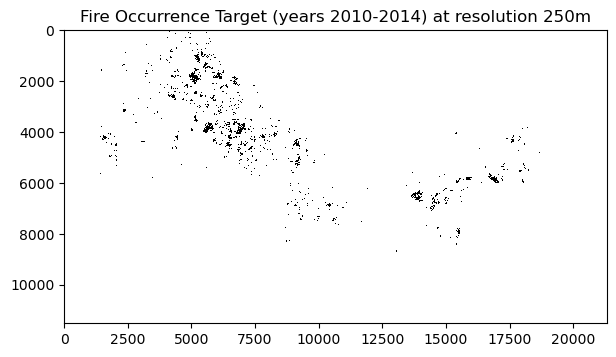

In [12]:
fire_occurrence_target_file_paths = fire_occurrence_target.generate_targets(range(2010, 2015))

fig, ax = plt.subplots(figsize=(7, 7))
fire_occurrence_target_ds_5_years = gdal.Open(str(fire_occurrence_target_file_paths[0].resolve()))
fire_occurrence_target_band_5_years = fire_occurrence_target_ds_5_years.GetRasterBand(1)
fire_occurrence_target_data_5_years = fire_occurrence_target_band_5_years.ReadAsArray()
ax.imshow(fire_occurrence_target_data_5_years, cmap='binary', interpolation='nearest')
ax.set_title("Fire Occurrence Target (years 2010-2014) at resolution 250m")